In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [12]:
data = pd.read_excel('./property_data_test.xlsx', sheet_name='dataset')

cols = list(data.columns)

new_cols = [x.upper().replace(" ", "_").replace(".","") for x in cols]

for ix, col in enumerate(cols):
    data = data.rename(columns={col:new_cols[ix]})

In [13]:
data.head()

,UK_REGION,POSTCODE,AVG_ASKING_PRICE,AVG_ASKING_RENT_(PM),SALES_PER_MONTH,AVG_BEDROOMS,AVG_POPULATION
0,East Midlands,DE1,142346.0,628.0,12.0,2.0,14438
1,East Midlands,DE3,267574.0,775.0,21.0,3.0,17094
2,East Midlands,DE4,310718.0,757.0,50.0,3.0,33461
3,East Midlands,DE5,211534.0,624.0,20.0,3.0,22075
4,East Midlands,DE6,388940.0,NaN,30.0,3.0,25599


- Pct of null data per region
  - Which one are more reliable data

- Rent yield
    - Rent yield by avg bedrooms?
    - Rent yield by avg population?

- Highest turnover in sales
      - Correlation with avg bedrooms? Linear regression

- Population and price?
- Population and rebt yield?

### How sparse is the dataset?

In [14]:
data

,UK_REGION,POSTCODE,AVG_ASKING_PRICE,AVG_ASKING_RENT_(PM),SALES_PER_MONTH,AVG_BEDROOMS,AVG_POPULATION
0,East Midlands,DE1,142346.0,628.0,12.0,2.0,14438
1,East Midlands,DE3,267574.0,775.0,21.0,3.0,17094
2,East Midlands,DE4,310718.0,757.0,50.0,3.0,33461
3,East Midlands,DE5,211534.0,624.0,20.0,3.0,22075
4,East Midlands,DE6,388940.0,NaN,30.0,3.0,25599
...,...,...,...,...,...,...,...
2180,West Midlands,WV12,192855.0,NaN,19.0,3.0,25417
2181,West Midlands,WV13,161442.0,NaN,10.0,3.0,20899
2182,West Midlands,WV14,176453.0,670.0,27.0,3.0,46931
2183,West Midlands,WV15,301648.0,NaN,9.0,3.0,8412


In [15]:
data[data.AVG_BEDROOMS.isna()]

,UK_REGION,POSTCODE,AVG_ASKING_PRICE,AVG_ASKING_RENT_(PM),SALES_PER_MONTH,AVG_BEDROOMS,AVG_POPULATION
1081,North West,M2,259444.0,NaN,NaN,NaN,87
1095,North West,M17,NaN,NaN,NaN,NaN,17


In [16]:
nas_summary_by_region = data.groupby('UK_REGION').apply(lambda x: x.isna().sum()/len(x))

In [17]:
# nas_summary_by_n_bedrooms = data.groupby('AVG_BEDROOMS').apply(lambda x: x.isna().sum()/len(x))

In [18]:
data.groupby('UK_REGION').count()

,POSTCODE,AVG_ASKING_PRICE,AVG_ASKING_RENT_(PM),SALES_PER_MONTH,AVG_BEDROOMS,AVG_POPULATION
UK_REGION,,,,,,
East Midlands,163,162,98,163,163,163
East of England,235,234,142,235,235,235
Greater London,274,274,261,274,274,274
North East,218,216,117,215,218,218
North West,302,298,174,298,300,302
South East,316,315,192,316,316,316
South West,275,271,89,273,275,275
Wales,180,173,29,179,180,180
West Midlands,222,221,138,220,222,222


In [19]:
nas_summary_by_region

,UK_REGION,POSTCODE,AVG_ASKING_PRICE,AVG_ASKING_RENT_(PM),SALES_PER_MONTH,AVG_BEDROOMS,AVG_POPULATION
UK_REGION,,,,,,,
East Midlands,0.0,0.0,0.006135,0.398773,0.000000,0.000000,0.0
East of England,0.0,0.0,0.004255,0.395745,0.000000,0.000000,0.0
Greater London,0.0,0.0,0.000000,0.047445,0.000000,0.000000,0.0
North East,0.0,0.0,0.009174,0.463303,0.013761,0.000000,0.0
North West,0.0,0.0,0.013245,0.423841,0.013245,0.006623,0.0
South East,0.0,0.0,0.003165,0.392405,0.000000,0.000000,0.0
South West,0.0,0.0,0.014545,0.676364,0.007273,0.000000,0.0
Wales,0.0,0.0,0.038889,0.838889,0.005556,0.000000,0.0
West Midlands,0.0,0.0,0.004505,0.378378,0.009009,0.000000,0.0


In [20]:
data.groupby('AVG_BEDROOMS').count()

,UK_REGION,POSTCODE,AVG_ASKING_PRICE,AVG_ASKING_RENT_(PM),SALES_PER_MONTH,AVG_POPULATION
AVG_BEDROOMS,,,,,,
0.0,2,2,2,1,1,2
1.0,9,9,9,9,8,9
2.0,301,301,300,279,299,301
3.0,1867,1867,1849,950,1862,1867
4.0,4,4,3,1,3,4


### Define some useful ratios

Annualising the avg rent ( x12)

In [21]:
data['AVG_MV_SOLD'] = data['AVG_ASKING_PRICE']*data['SALES_PER_MONTH']

In [71]:
data['YIELD'] = data['AVG_ASKING_RENT_(PM)']*12/data['AVG_ASKING_PRICE']

data['SALES_PER_PERSON'] = data['SALES_PER_MONTH'] / data['AVG_POPULATION']

# Rental Yield

- **Yield across the country:**
    - Yield picking up North East/West
    - Suggesting more profitable regions for buy to let


- **Yield Vs avg house size of the borough:**
  
    - MAIN TAKEAWAY: decreasing yield in boroughs with bigger houses.
    - This might suggests that we can find bigger houses in more remote areas where the appetite for rents is lower.
    - **Careful** with conclusions as there are not many data avavilable 



**Rent yield Vs number of sales:**
    - YYield is higher when the sales market is weak. Is this just a case for that month or a trend. That would need to be investigated further.

**Yield Vs Population:**
    - 
More populated boroughs tend to have higher yield    - 
Results are a mixed bad, but some are better like: south east and greater london




More populated boroughs tend to have higher yield



In [24]:
data.groupby('UK_REGION')['YIELD'].describe()

,count,mean,std,min,25%,50%,75%,max
UK_REGION,,,,,,,,
East Midlands,98.0,0.040202,0.008694,0.026826,0.034917,0.038638,0.043223,0.076005
East of England,142.0,0.036167,0.006873,0.020299,0.031176,0.035764,0.040409,0.059313
Greater London,261.0,0.034934,0.005968,0.019681,0.030837,0.034752,0.038406,0.054560
North East,117.0,0.046636,0.011674,0.027693,0.038438,0.045874,0.051303,0.095047
North West,174.0,0.044574,0.010163,0.025907,0.038519,0.044126,0.049922,0.117225
South East,192.0,0.036183,0.006899,0.023344,0.031717,0.035328,0.039657,0.061391
South West,89.0,0.038208,0.005527,0.025805,0.034283,0.038009,0.042417,0.050312
Wales,29.0,0.043020,0.012034,0.029921,0.035278,0.039339,0.046608,0.080981
West Midlands,138.0,0.039730,0.007714,0.025523,0.033191,0.039557,0.045384,0.065350


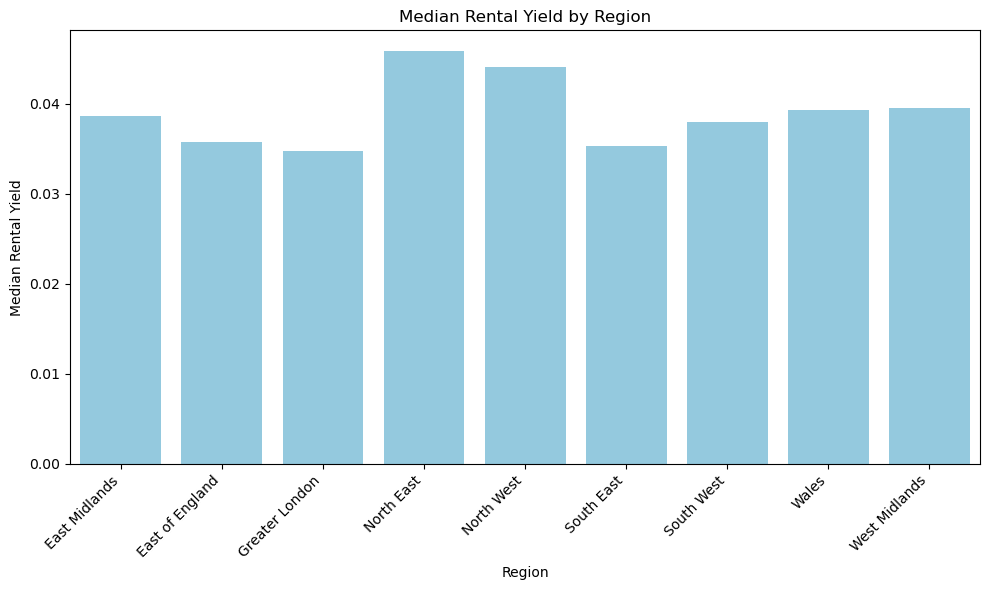

In [25]:
to_plot = data.groupby('UK_REGION')['YIELD'].median().reset_index()


# Set the color for all bars
bar_color = 'skyblue'

# Create the barplot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.barplot(x='UK_REGION', y='YIELD', data=to_plot, color=bar_color)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# def thousands_formatter(x, pos):
#     return '{:,.0f}'.format(x)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Median Rental Yield')
plt.title('Median Rental Yield by Region')

# Show the plot
plt.tight_layout()
plt.show()

### Yield Vs Boroughs avg house size

In [30]:
data.groupby('AVG_BEDROOMS').count()['YIELD']

AVG_BEDROOMS
0.0      1
1.0      9
2.0    279
3.0    950
4.0      1
Name: YIELD, dtype: int64

C:\Users\milen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\milen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AVG_BEDROOMS', ylabel='YIELD'>

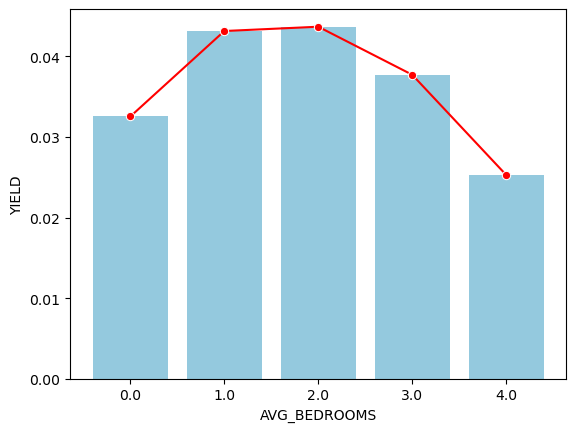

In [31]:
to_plot = data.groupby('AVG_BEDROOMS')['YIELD'].mean().reset_index()

sns.barplot(x=to_plot['AVG_BEDROOMS'], y=to_plot['YIELD'],color=bar_color)
sns.lineplot(x=to_plot["AVG_BEDROOMS"], y=to_plot["YIELD"], color='red', marker='o')

C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

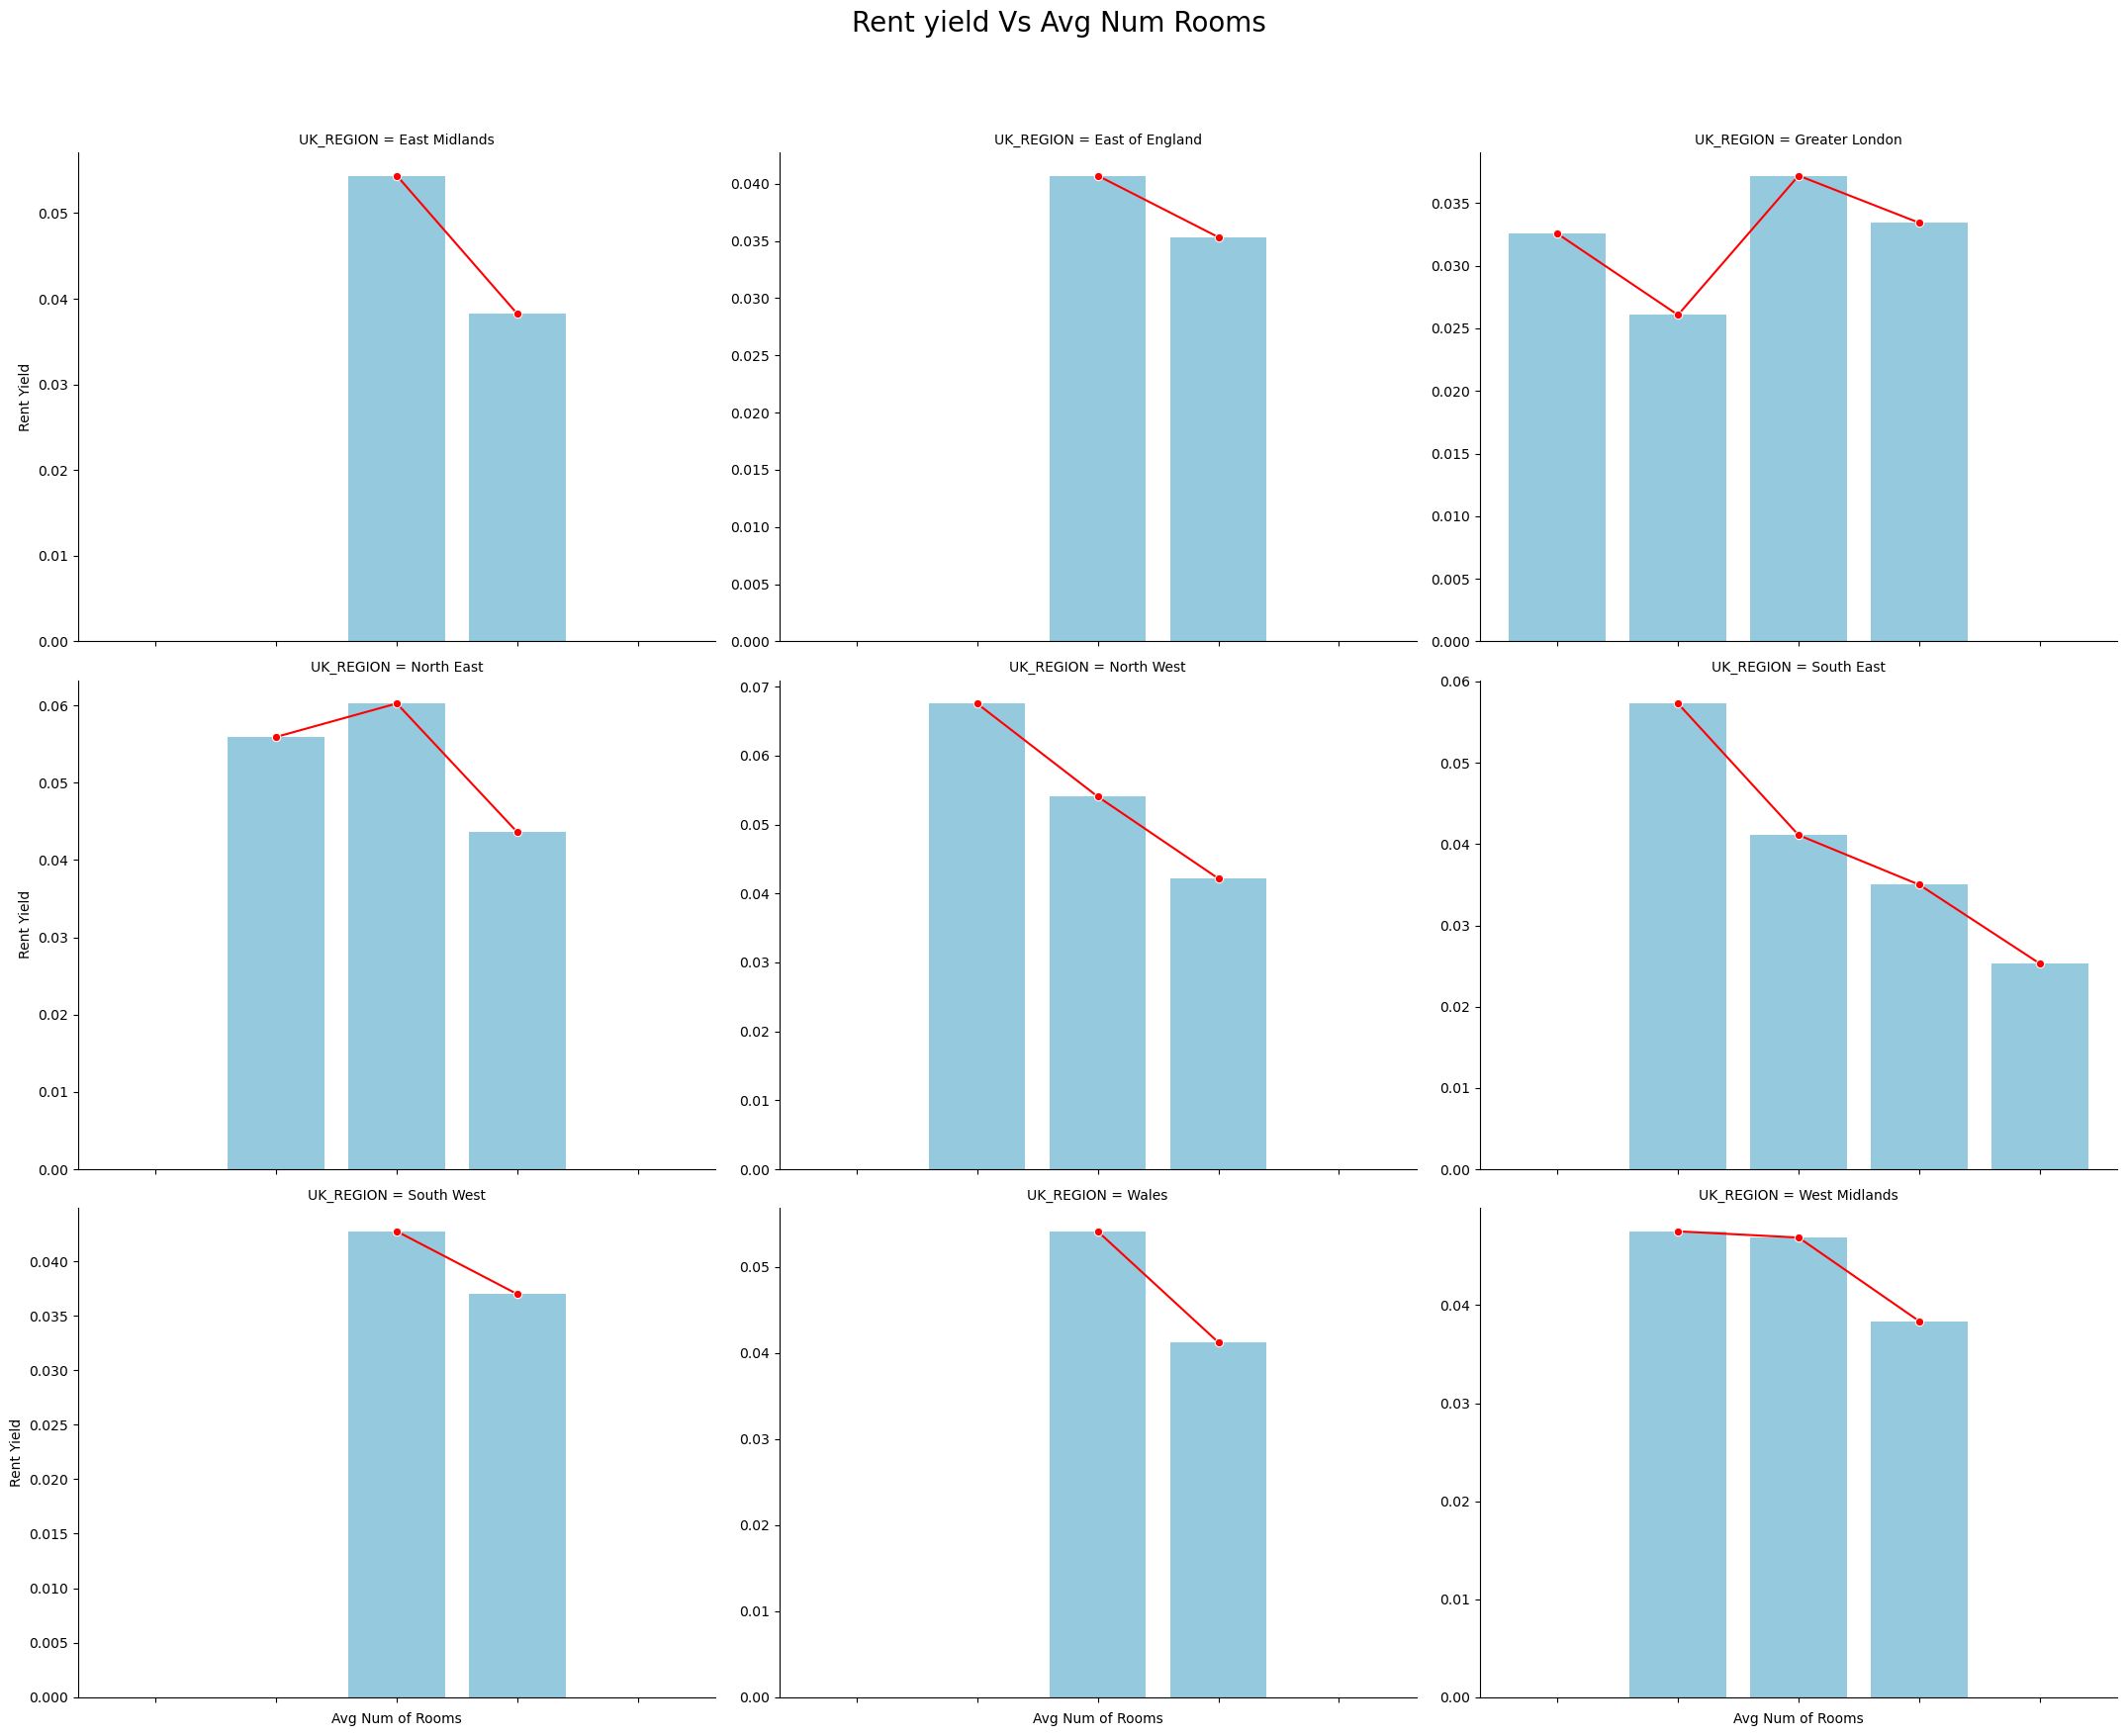

In [22]:
to_plot = data.groupby(['UK_REGION','AVG_BEDROOMS'])['YIELD'].mean().reset_index()

# Convert the 'Category' column to a categorical type and specify the order
category_order = [0, 1, 2, 3, 4]
to_plot['AVG_BEDROOMS'] = pd.Categorical(to_plot['AVG_BEDROOMS'], categories=category_order, ordered=True)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


# Set the color for all bars
bar_color = 'skyblue'

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create the FacetGrid
g = sns.FacetGrid(to_plot, col="UK_REGION", height=6, aspect=1.2, col_wrap=3, sharey=False, sharex=True)
g.map_dataframe(sns.barplot, x="AVG_BEDROOMS", y="YIELD", color=bar_color)

g.map_dataframe(sns.lineplot, x="AVG_BEDROOMS", y="YIELD", color='red', marker='o')

# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    # ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
g.set_axis_labels("Avg Num of Rooms", "Rent Yield")
g.fig.suptitle('Rent yield Vs Avg Num Rooms ', fontsize=20)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

# Show the plot
plt.show()


### Higher yield in the North

Can it be explained by a higher proportion of boroughs with 2bed flats? **NO**

In [51]:
count_by_region_size = data.groupby(['UK_REGION','AVG_BEDROOMS']).count()['YIELD'].reset_index().rename(columns={'YIELD':'COUNT'})

count_by_region_size = count_by_region_size.set_index('AVG_BEDROOMS')

count_by_region_size.groupby('UK_REGION').apply(lambda x: x['COUNT']/x['COUNT'].sum())

UK_REGION        AVG_BEDROOMS
East Midlands    2.0             0.122449
                 3.0             0.877551
East of England  2.0             0.154930
                 3.0             0.845070
                 4.0             0.000000
Greater London   0.0             0.003831
                 1.0             0.015326
                 2.0             0.432950
                 3.0             0.547893
North East       1.0             0.017094
                 2.0             0.170940
                 3.0             0.811966
                 4.0             0.000000
North West       1.0             0.005747
                 2.0             0.189655
                 3.0             0.804598
South East       1.0             0.005208
                 2.0             0.182292
                 3.0             0.807292
                 4.0             0.005208
South West       2.0             0.213483
                 3.0             0.786517
                 4.0             0.000000
Wale

### Rent yield Vs number of sales

- Relationship between scarcity of sales on the market and rental yield. Yield is higher when the sales market is weak.
Is this just a case for that month or a trend. That would need to be investigated further.



<Axes: xlabel='SALES_PER_MONTH', ylabel='YIELD'>

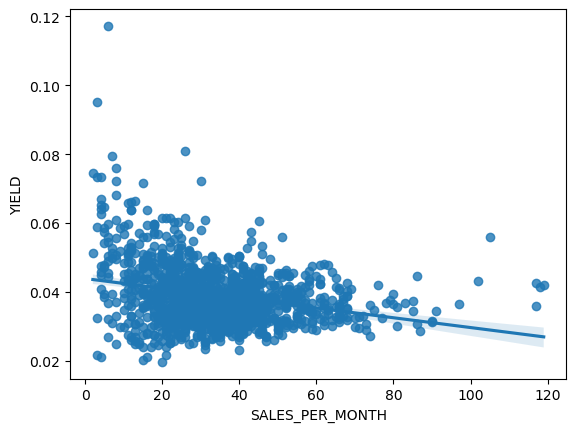

In [53]:
sns.regplot(x=data['SALES_PER_MONTH'], y=data['YIELD'])

C:\Users\milen\AppData\Local\Temp\ipykernel_19892\2202350421.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_19892\2202350421.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_19892\2202350421.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


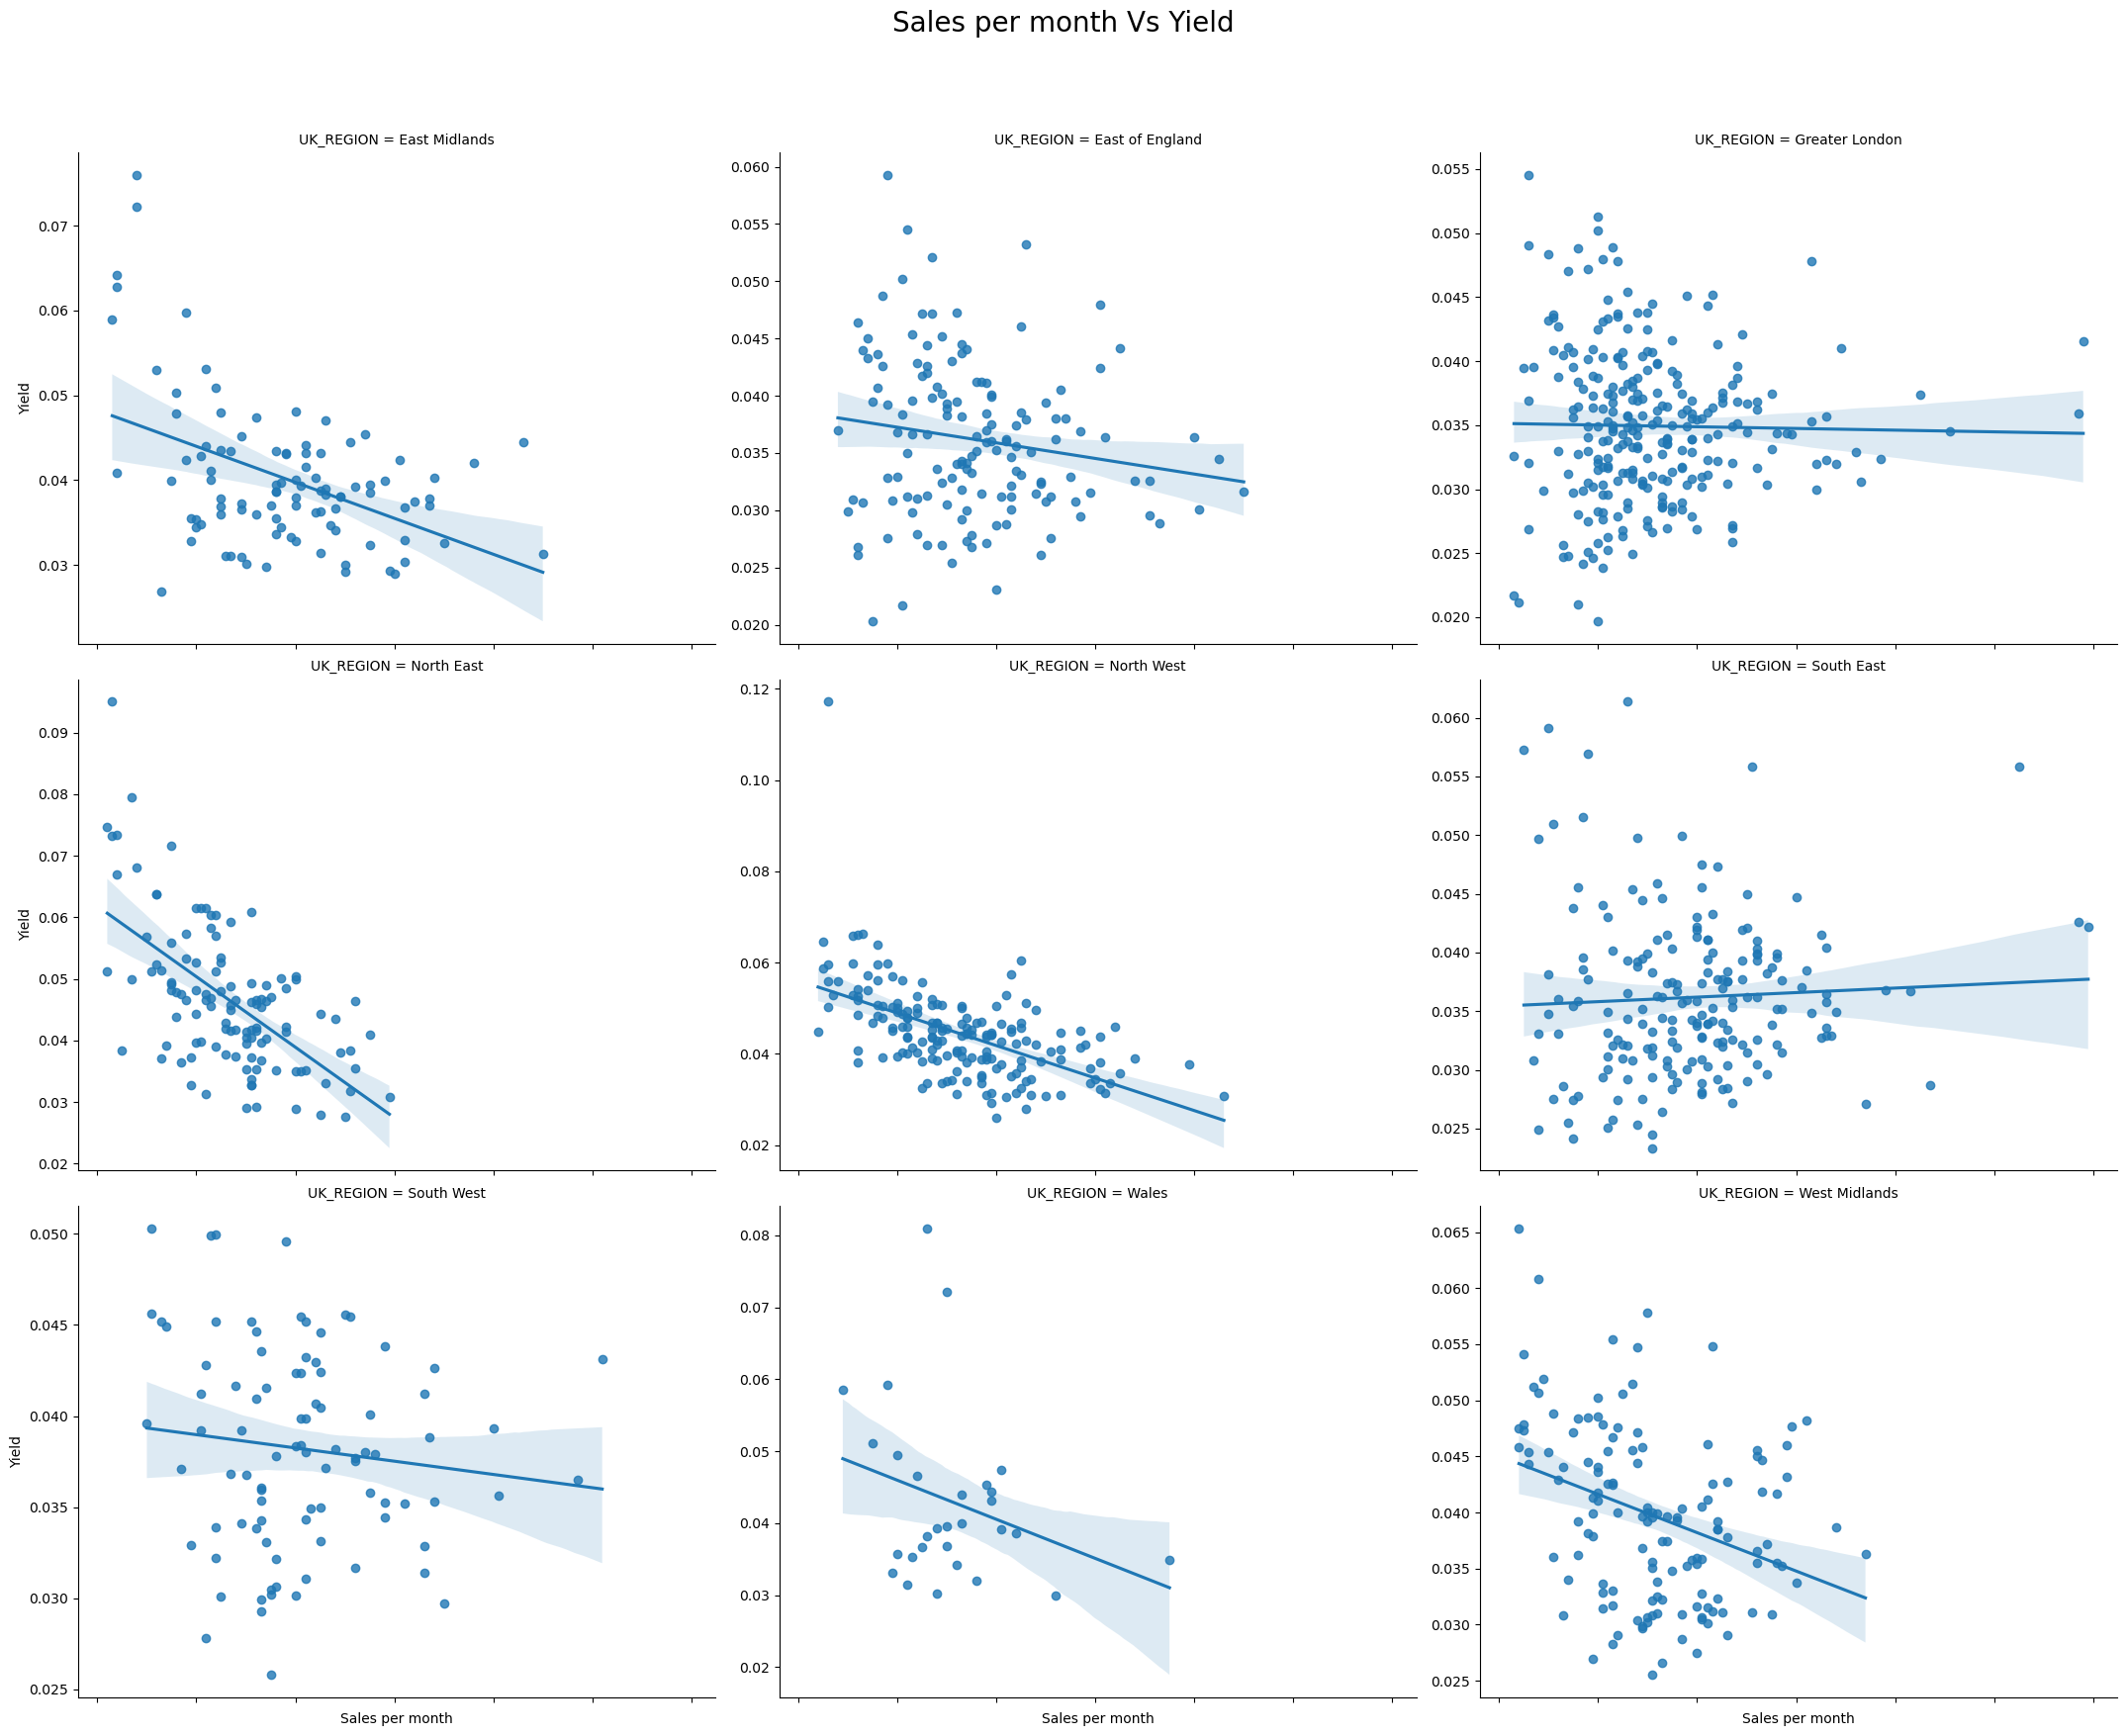

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Sample data

# Melt the DataFrame
data

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create the FacetGrid
g = sns.FacetGrid(data, col="UK_REGION", height=6, aspect=1.2, col_wrap=3, sharey=False)
g.map_dataframe(sns.regplot, y="YIELD", x="SALES_PER_MONTH")

# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    # ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
g.set_axis_labels("Sales per month", "Yield")
g.fig.suptitle('Sales per month Vs Yield', fontsize=20)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

# Show the plot
plt.show()


### Yield Vs Population

-  More populated boroughs tend to have higher yield
-  Results are a mixed bad, but some are better like: south east and greater london

<Axes: xlabel='AVG_POPULATION', ylabel='YIELD'>

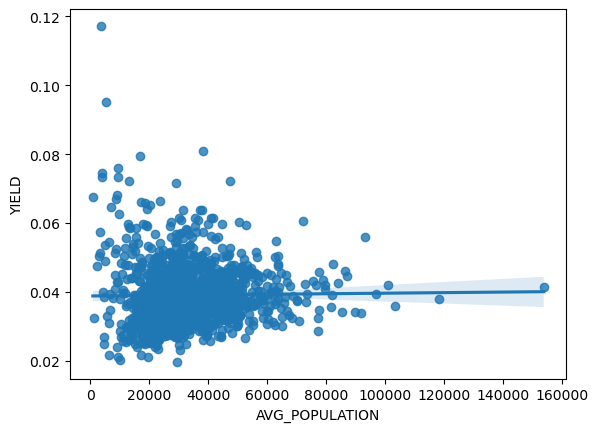

In [56]:
sns.regplot(x=data['AVG_POPULATION'], y=data['YIELD'])

C:\Users\milen\AppData\Local\Temp\ipykernel_19892\2997581296.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_19892\2997581296.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_19892\2997581296.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


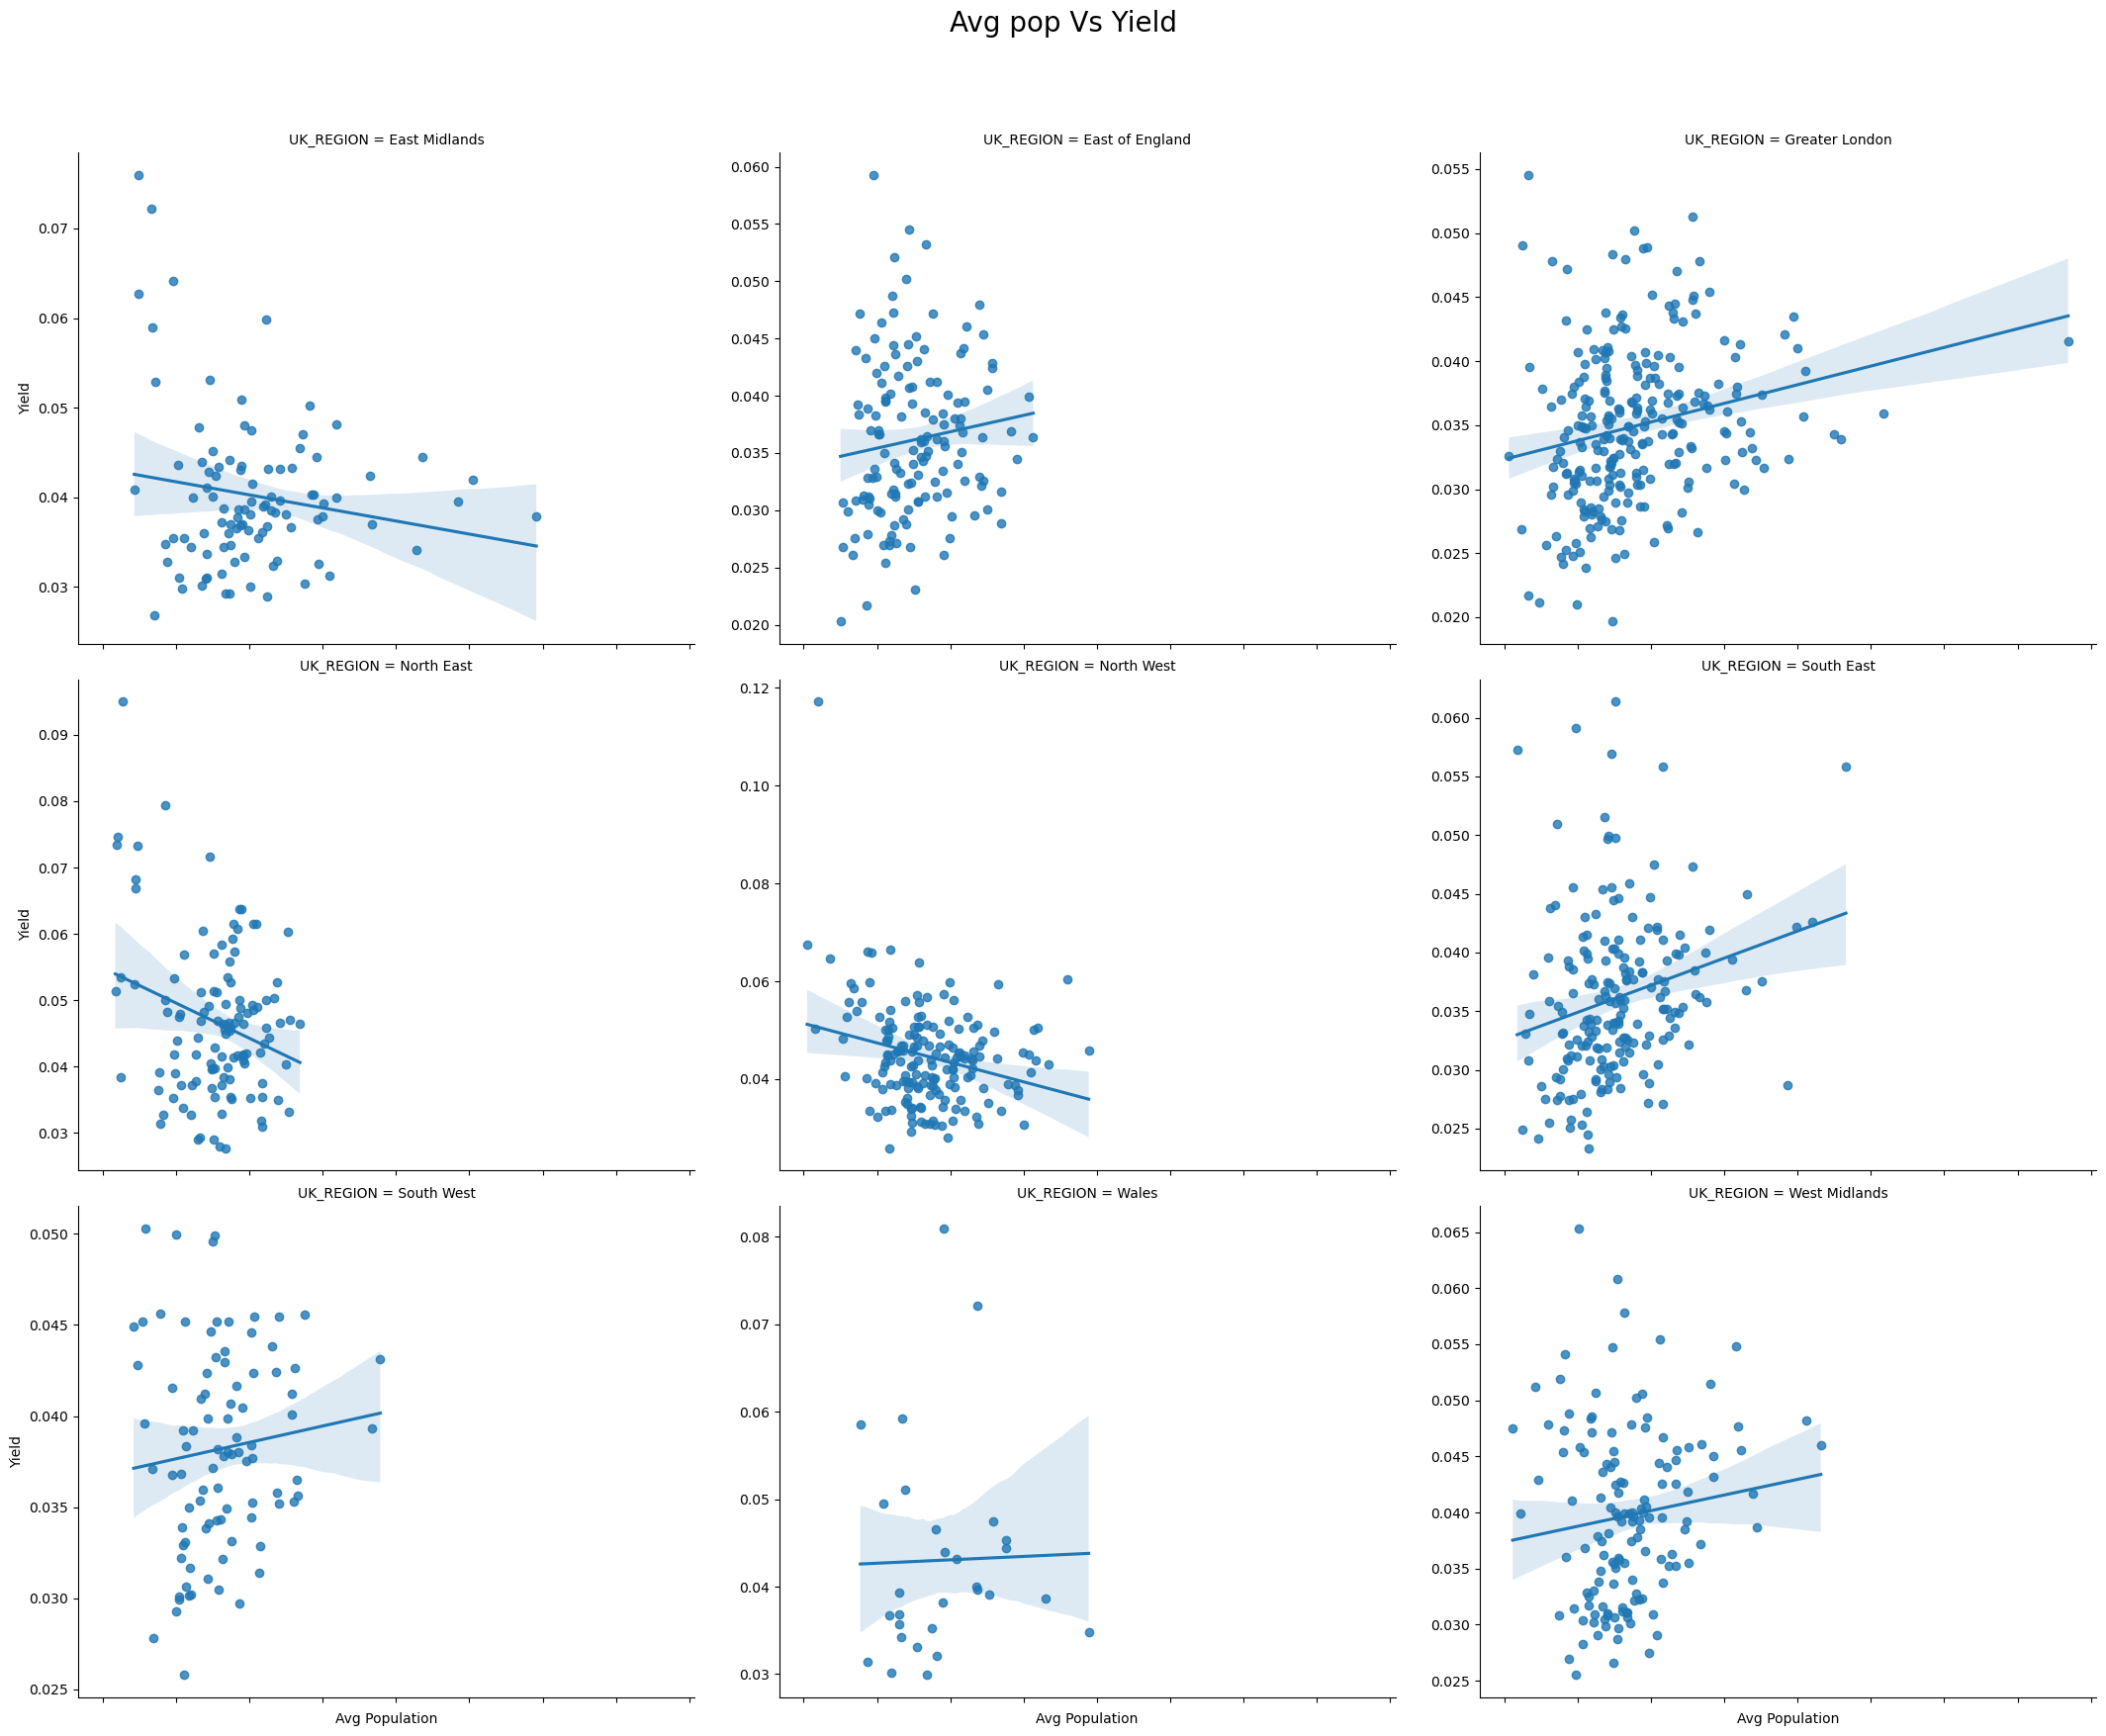

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Sample data

# Melt the DataFrame
data

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create the FacetGrid
g = sns.FacetGrid(data, col="UK_REGION", height=6, aspect=1.2, col_wrap=3, sharey=False)
g.map_dataframe(sns.regplot, y="YIELD", x="AVG_POPULATION")

# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    # ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
g.set_axis_labels("Avg Population", "Yield")
g.fig.suptitle('Avg pop Vs Yield', fontsize=20)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

# Show the plot
plt.show()


# Sales

**Capital required**:

    - South areas more expensive,
    - Higher capital required for investments
    - To connect to the fact that the yield is generaly lower

**Liquidity**:

    - More populated areas have higher number of sales.
    - Pretty obvious one, but essential for liquidity analysis on the investment.

In [15]:
data.groupby('UK_REGION').describe().T

UK_REGION               East Midlands  East of England  Greater London  \
AVG_ASKING_PRICE count     162.000000       234.000000    2.740000e+02   
                 mean   217469.524691    358678.290598    5.502826e+05   
                 std     68780.382556    120224.714692    2.415004e+05   
                 min     73258.000000    168612.000000    2.122420e+05   
                 25%    162092.500000    278430.250000    4.150970e+05   
...                               ...              ...             ...   
PRICE_PER_ROOM   min     32535.000000     56204.000000    9.490467e+04   
                 25%     59888.333333     96389.000000    1.539536e+05   
                 50%     70434.166667    114935.000000    1.864399e+05   
                 75%     87849.333333    142062.833333    2.522616e+05   
                 max    152858.500000    315185.000000             inf   

UK_REGION                  North East     North West     South East  \
AVG_ASKING_PRICE count     216.000000     298.000000     315.000000   
                 mean   199280.152778  204515.167785  396980.073016   
                 std     79437.399801   73963.441960  112609.935815   
                 min     63769.000000   52412.000000  204563.000000   
                 25%    138057.500000  154284.250000  315110.500000   
...                               ...            ...            ...   
PRICE_PER_ROOM   min     27931.666667   26206.000000   70332.333333   
                 25%     47769.916667   54619.333333  111395.000000   
                 50%     65242.166667   65638.666667  134496.500000   
                 75%     86376.083333   84806.333333  163022.166667   
                 max    337476.000000  158170.000000  294298.666667   

UK_REGION                  South West          Wales  West Midlands  
AVG_ASKING_PRICE count     271.000000     173.000000   2.210000e+02  
                 mean   330427.143911  232698.196532   2.576061e+05  
                 std     92797.572475   75635.533095   7.871904e+04  
                 min    166054.000000   87104.000000   1.094820e+05  
                 25%    275827.500000  180036.000000   1.981980e+05  
...                               ...            ...            ...  
PRICE_PER_ROOM   min     57314.333333   29034.666667   4.236800e+04  
                 25%     93330.500000   60327.000000   7.021967e+04  
                 50%    106824.333333   75873.666667   8.523600e+04  
                 75%    131518.250000   95096.666667   1.043083e+05  
                 max    363636.333333  170006.666667            inf  

[64 rows x 9 columns]

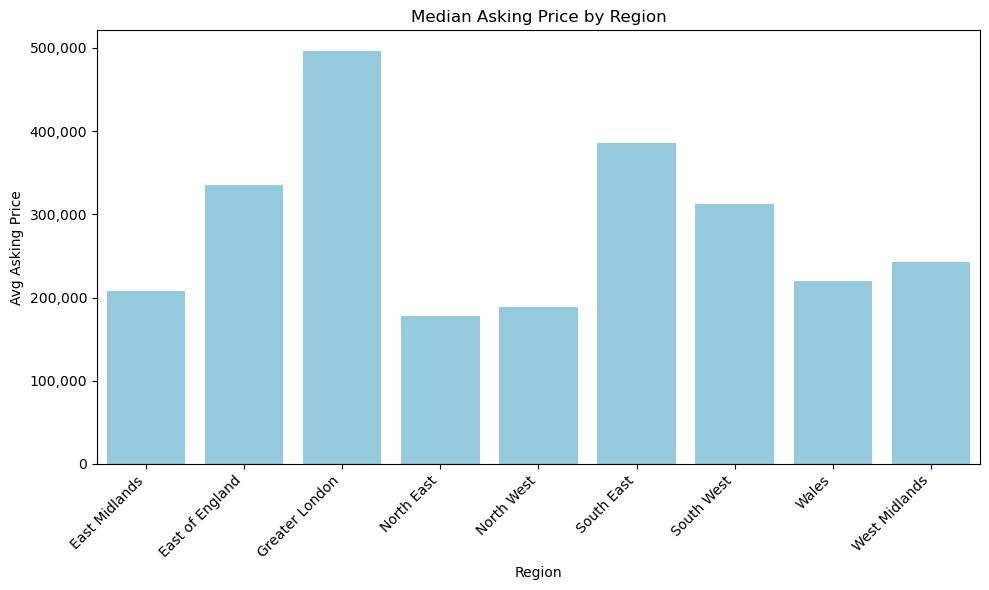

In [16]:
to_plot = data.groupby('UK_REGION')['AVG_ASKING_PRICE'].median().reset_index()
to_plot_rhs = data.groupby('UK_REGION')['SALES_PER_MONTH'].median().reset_index()

# Set the color for all bars
bar_color = 'skyblue'

# Create the barplot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.barplot(x='UK_REGION', y='AVG_ASKING_PRICE', data=to_plot, color=bar_color)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Avg Asking Price')
plt.title('Median Asking Price by Region')

# Show the plot
plt.tight_layout()
plt.show()

### Liquidity

<Axes: xlabel='AVG_POPULATION', ylabel='SALES_PER_MONTH'>

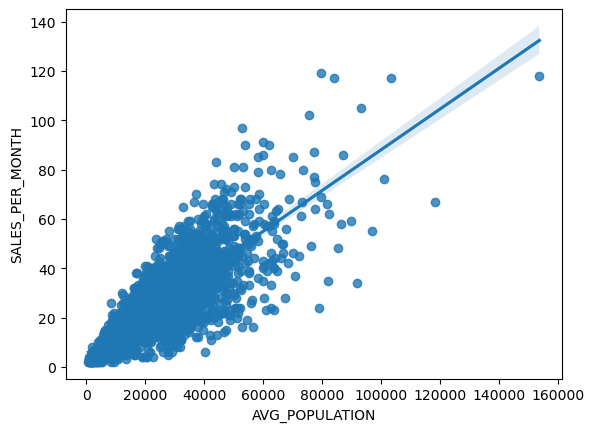

In [72]:
sns.regplot(x=data.AVG_POPULATION, y=data.SALES_PER_MONTH)

In [77]:
to_plot = data.groupby('UK_REGION')['SALES_PER_PERSON'].mean().reset_index()

In [78]:
to_plot

,UK_REGION,SALES_PER_PERSON
0,East Midlands,0.000970
1,East of England,0.001305
2,Greater London,0.000968
3,North East,0.000969
4,North West,0.001000
5,South East,0.001358
6,South West,0.001429
7,Wales,0.001029
8,West Midlands,0.000961


<Axes: xlabel='UK_REGION', ylabel='SALES_PER_PERSON'>

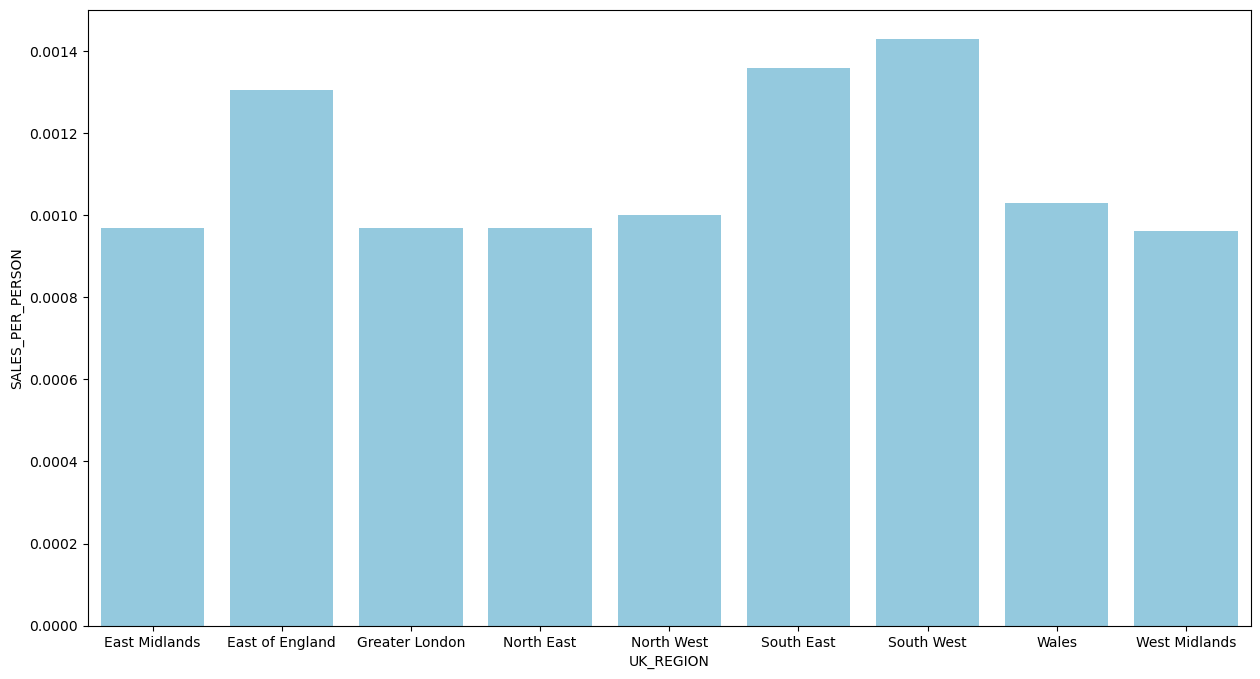

In [81]:
f,ax = plt.subplots(figsize=(15,8))
sns.barplot(x=to_plot['UK_REGION'], y=to_plot['SALES_PER_PERSON'], color=bar_color)

## Visualise some ratios.

- **Price Vs Population:** results suggest that there's an inverse relation between these two variables.

        - This means that highly densly populated areas probably also correspond to poorer neighborhoods.
        - Look at examples: Croydon Vs West Ken
  
        - Counter-intuitive as you'd expect more remote areas to be less expensive. ( maybe bigger houses?)

In [62]:
data.groupby('AVG_BEDROOMS').count()['POSTCODE']

AVG_BEDROOMS
0.0       2
1.0       9
2.0     301
3.0    1867
4.0       4
Name: POSTCODE, dtype: int64

C:\Users\milen\AppData\Local\Temp\ipykernel_19892\4199670179.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_19892\4199670179.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_19892\4199670179.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_19892\4199670179.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

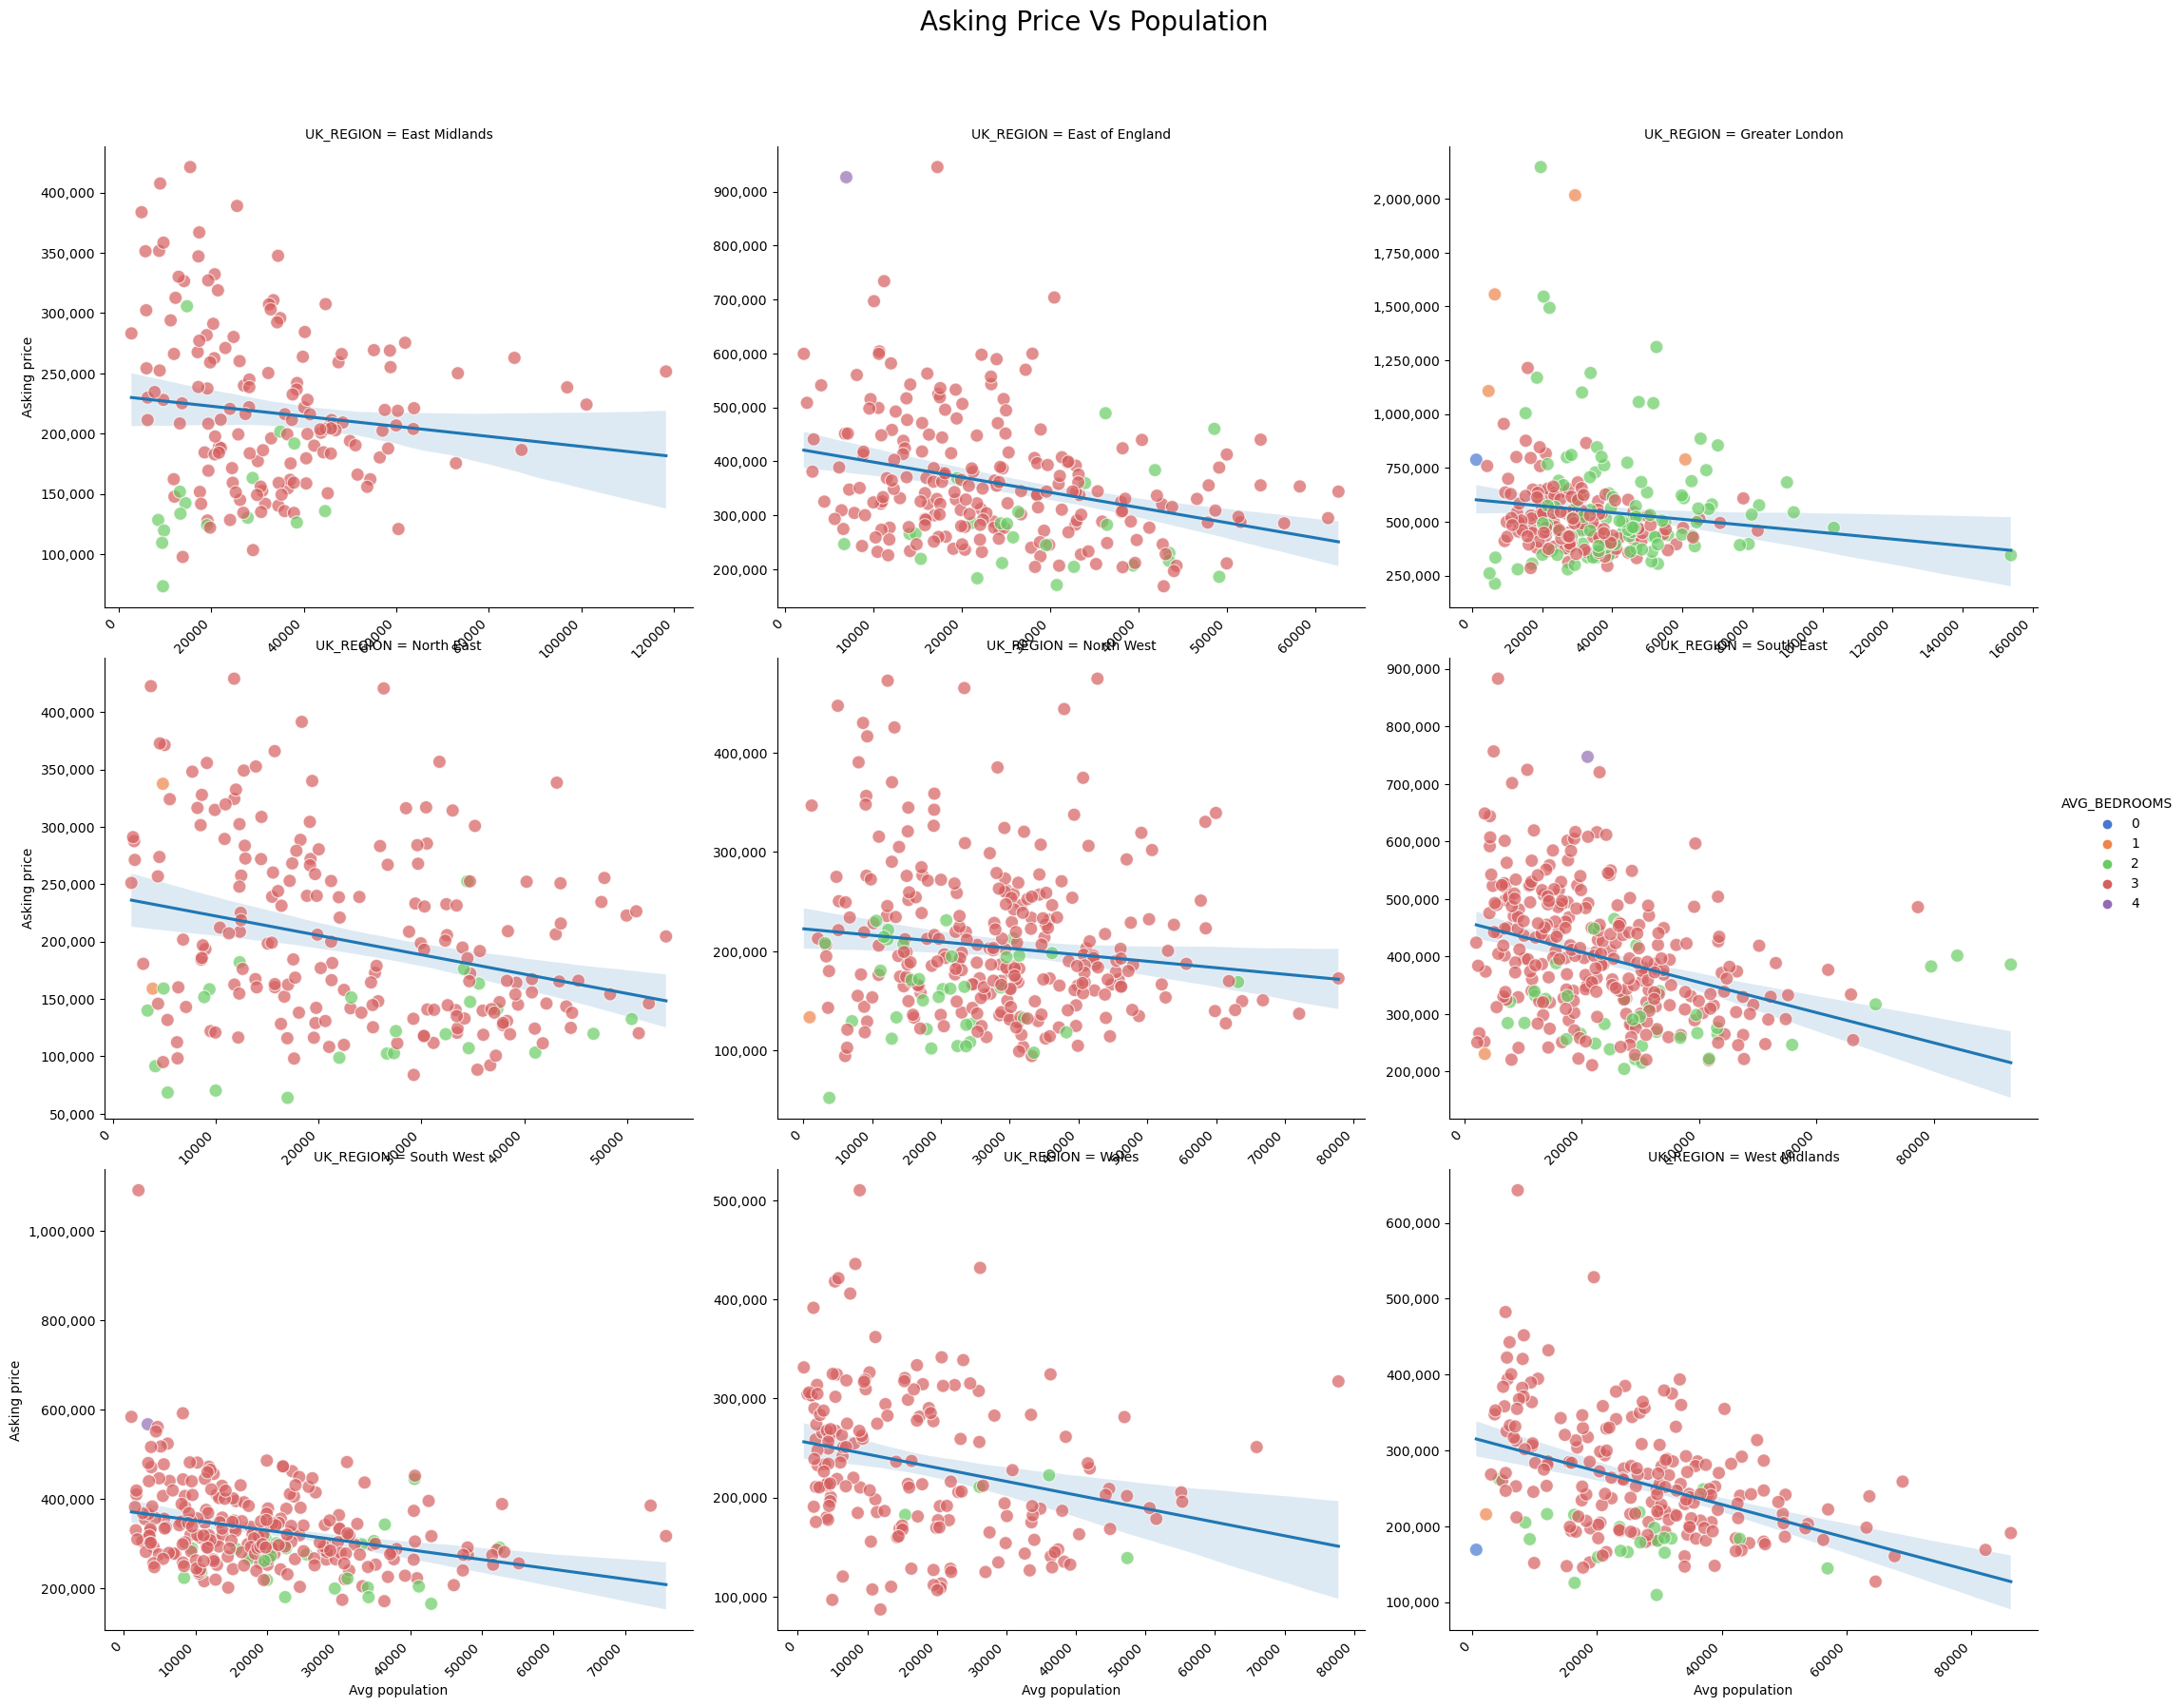

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Sample data


to_plot = data.copy()

# Convert the 'Category' column to a categorical type and specify the order
category_order = [0, 1, 2, 3, 4]
to_plot['AVG_BEDROOMS'] = pd.Categorical(to_plot['AVG_BEDROOMS'], categories=category_order, ordered=True)

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create the FacetGrid
g = sns.FacetGrid(to_plot, col="UK_REGION", height=6, aspect=1.2, col_wrap=3, sharey=False, sharex=False)
g.map_dataframe(sns.regplot, x="AVG_POPULATION", y="AVG_ASKING_PRICE", scatter=False)

g.map_dataframe(sns.scatterplot, x='AVG_POPULATION', y='AVG_ASKING_PRICE', hue='AVG_BEDROOMS', palette='muted', s=100,alpha=0.7)


# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
g.set_axis_labels("Avg population", "Asking price")
g.fig.suptitle('Asking Price Vs Population', fontsize=20)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

handles, labels = g.axes.flat[0].get_legend_handles_labels()
g.add_legend(title='AVG_BEDROOMS')

# Show the plot
plt.show()


In [64]:
xx=data[data.UK_REGION=='Greater London']

In [68]:

xx[xx.AVG_ASKING_PRICE>1800000]

,UK_REGION,POSTCODE,AVG_ASKING_PRICE,AVG_ASKING_RENT_(PM),SALES_PER_MONTH,AVG_BEDROOMS,AVG_POPULATION,AVG_MV_SOLD,YIELD
602,Greater London,SW7,2147277.0,3765.0,16.0,2.0,19587,34356432.0,0.021041
645,Greater London,W1,2016313.0,3307.0,20.0,1.0,29411,40326260.0,0.019681


In [70]:
xx[xx.AVG_POPULATION>100000]

,UK_REGION,POSTCODE,AVG_ASKING_PRICE,AVG_ASKING_RENT_(PM),SALES_PER_MONTH,AVG_BEDROOMS,AVG_POPULATION,AVG_MV_SOLD,YIELD
406,Greater London,CR0,344196.0,1192.0,118.0,2.0,153811,40615128.0,0.041558
447,Greater London,E17,471876.0,1412.0,117.0,2.0,103276,55209492.0,0.035908


C:\Users\milen\AppData\Local\Temp\ipykernel_5444\2009385938.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_5444\2009385938.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\milen\AppData\Local\Temp\ipykernel_5444\2009385938.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


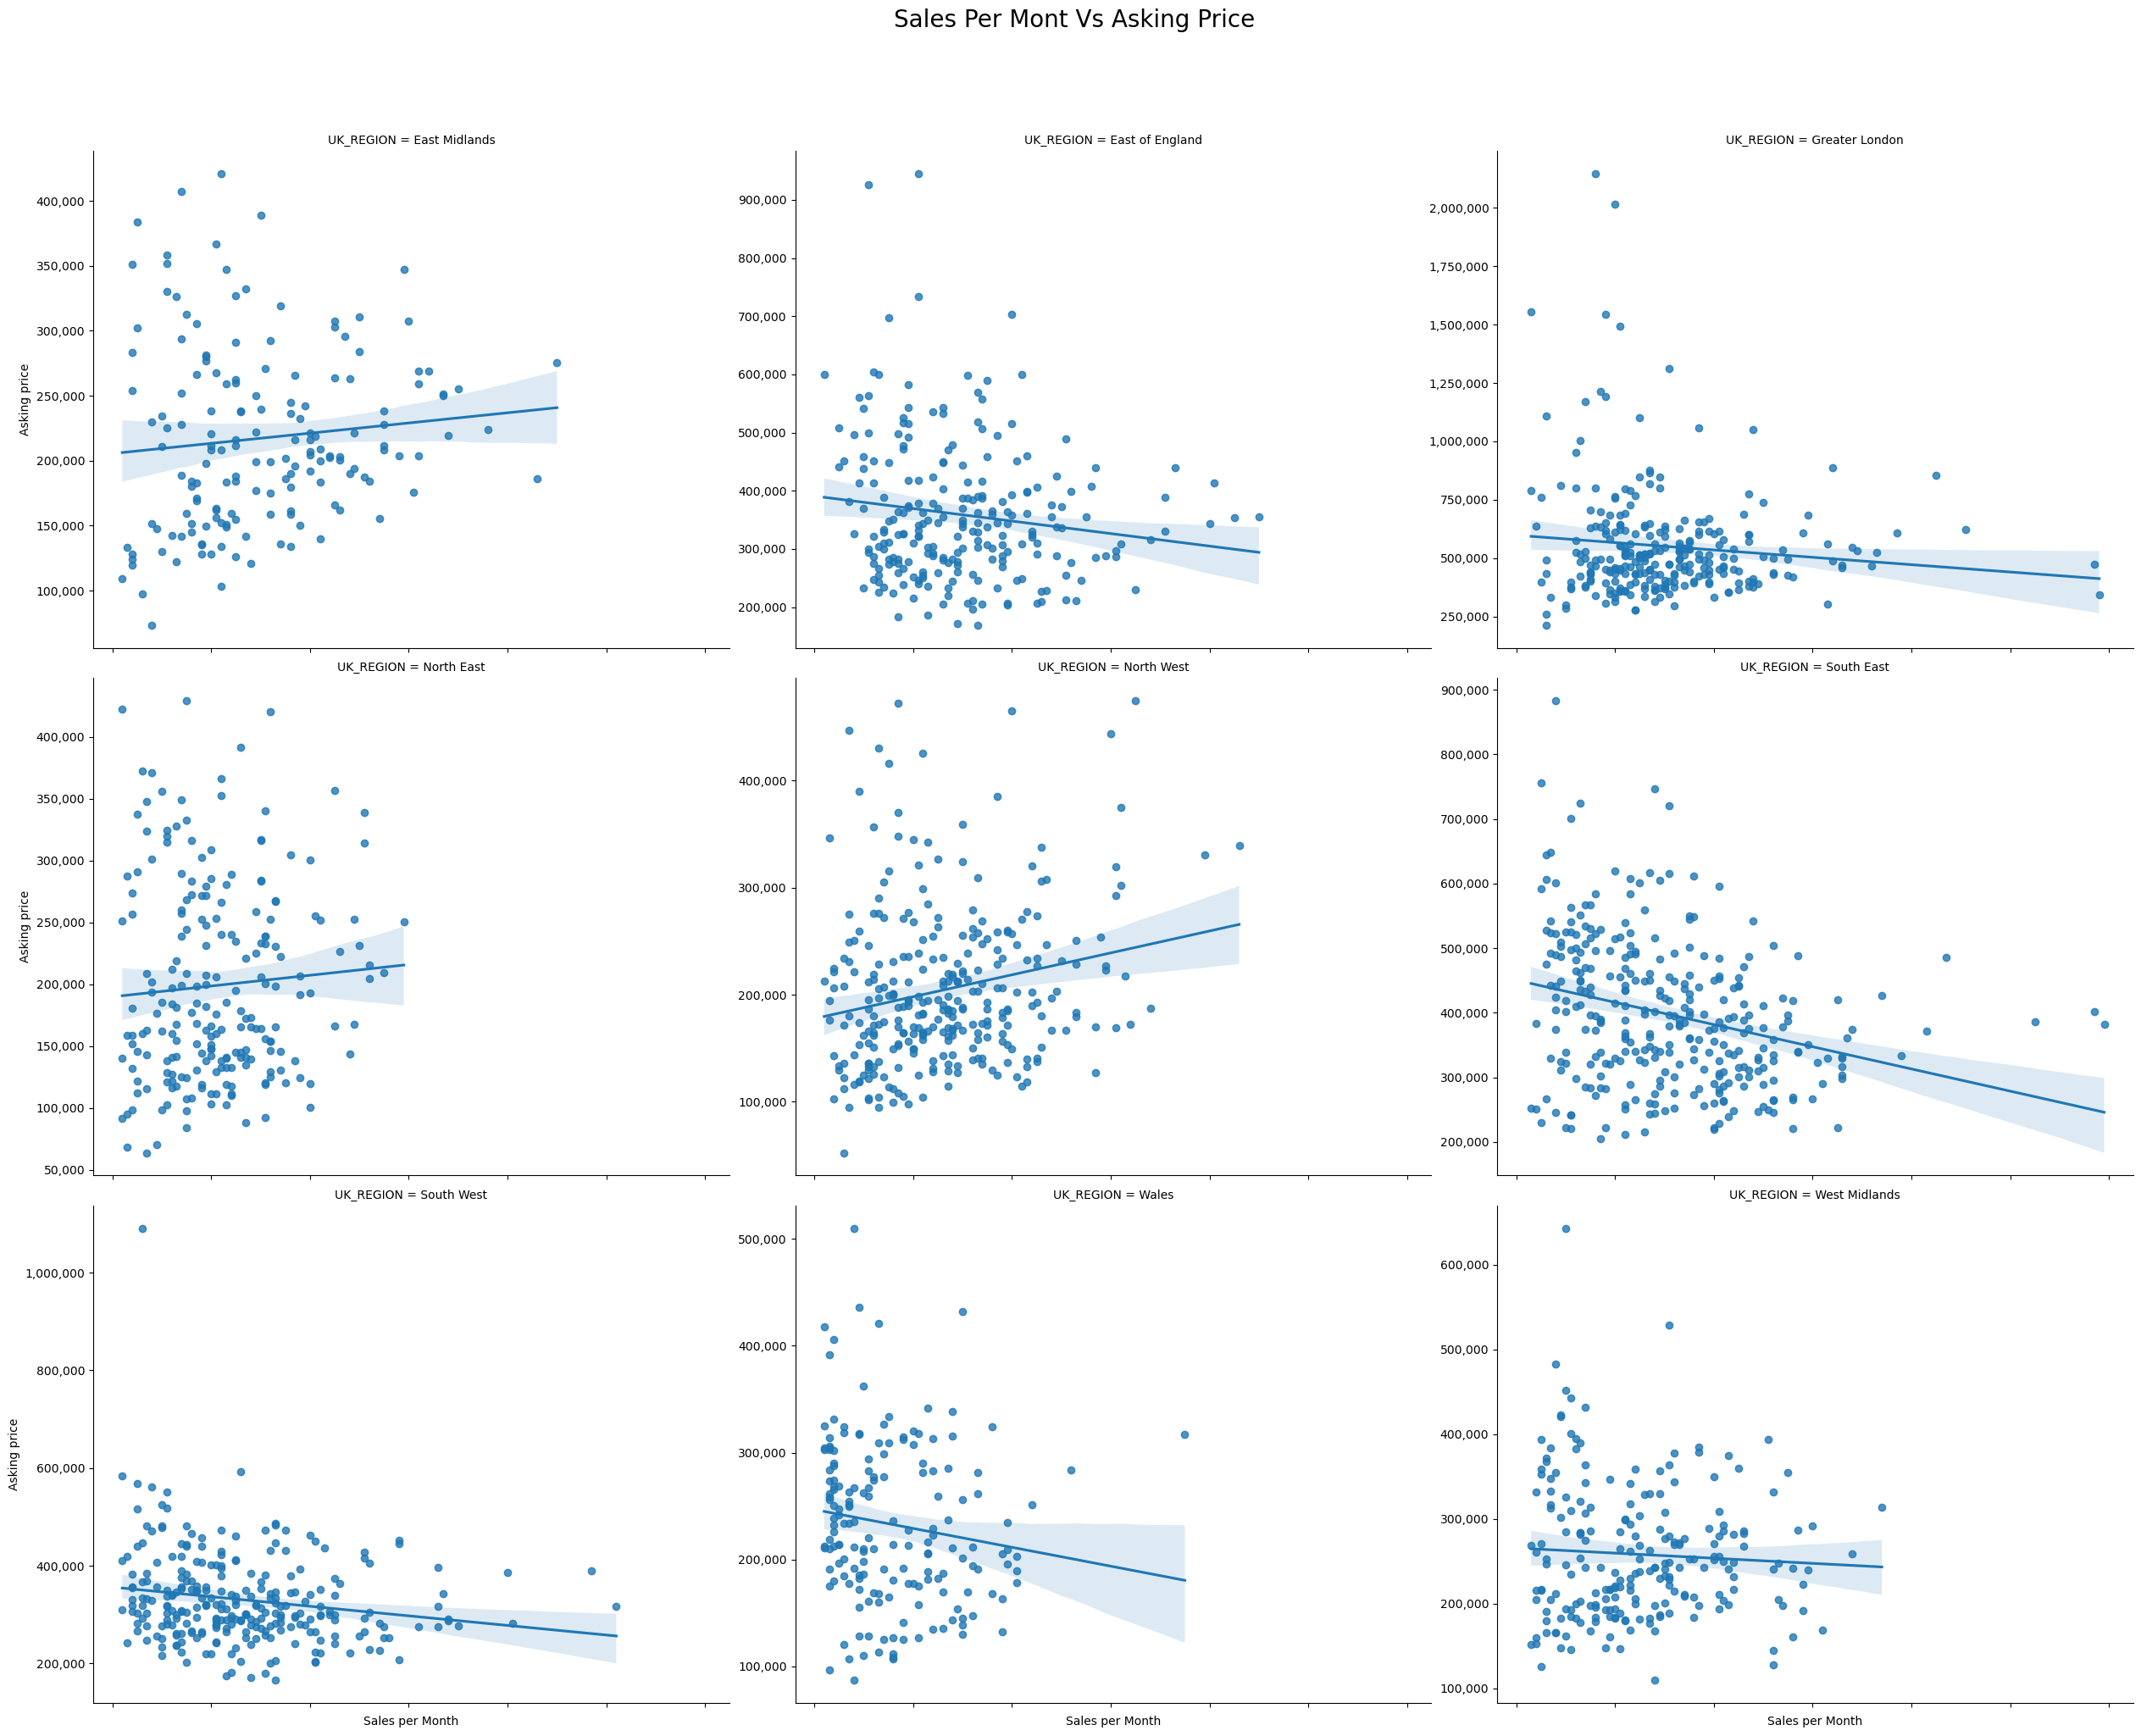

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Sample data

# Melt the DataFrame
data

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create the FacetGrid
g = sns.FacetGrid(data, col="UK_REGION", height=7, aspect=1.2, col_wrap=3, sharey=False)
g.map_dataframe(sns.regplot, y="AVG_ASKING_PRICE", x="SALES_PER_MONTH")

# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
g.set_axis_labels("Sales per Month", "Asking price")
g.fig.suptitle('Sales Per Mont Vs Asking Price ', fontsize=20)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Sample data

# Melt the DataFrame
data

# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create the FacetGrid
g = sns.FacetGrid(data, col="UK_REGION", height=6, aspect=1.2, col_wrap=3, sharey=False)
g.map_dataframe(sns.regplot, y="AVG_ASKING_PRICE", x="SALES_PER_MONTH")

# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
g.set_axis_labels("Sales per Month", "Asking price")
g.fig.suptitle('Sales Per Mont Vs Asking Price ', fontsize=20)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

# Show the plot
plt.show()


## Rooms Vs ...

As expected in Greater london there are more 2 bed flats, compared to the rest of the country

In [51]:
data.groupby(['UK_REGION','AVG_BEDROOMS']).count()['POSTCODE']

UK_REGION        AVG_BEDROOMS
East Midlands    2.0              15
                 3.0             148
East of England  2.0              24
                 3.0             210
                 4.0               1
Greater London   0.0               1
                 1.0               4
                 2.0             113
                 3.0             156
North East       1.0               2
                 2.0              24
                 3.0             191
                 4.0               1
North West       1.0               1
                 2.0              36
                 3.0             263
South East       1.0               1
                 2.0              38
                 3.0             276
                 4.0               1
South West       2.0              25
                 3.0             249
                 4.0               1
Wales            2.0               4
                 3.0             176
West Midlands    0.0               1
        

### Is there a relationship between houses sold in the month and predominance of houses with a certain number of bedrooms?

### Average asking price by bedrooms

- In greater London boroughs with predominantly smaller houses cost more than bigger - more central
- We tend to find bigger houses are further away from central areas 

In [54]:
data.groupby(['UK_REGION','AVG_BEDROOMS'])[['SALES_PER_MONTH','AVG_ASKING_PRICE','AVG_ASKING_RENT_(PM)']].mean()

SALES_PER_MONTH  AVG_ASKING_PRICE  \
UK_REGION       AVG_BEDROOMS                                      
East Midlands   2.0                 14.066667      1.490863e+05   
                3.0                 31.939189      2.244474e+05   
East of England 2.0                 29.125000      2.758178e+05   
                3.0                 30.000000      3.654754e+05   
                4.0                 11.000000      9.267300e+05   
Greater London  0.0                  3.000000      7.880000e+05   
                1.0                 13.000000      1.367088e+06   
                2.0                 32.159292      5.702200e+05   
                3.0                 29.544872      5.133732e+05   
North East      1.0                  4.500000      2.482110e+05   
                2.0                 16.130435      1.301628e+05   
                3.0                 22.147368      2.074957e+05   
                4.0                       NaN               NaN   
North West      1.0                       NaN      1.335740e+05   
                2.0                 16.388889      1.594904e+05   
                3.0                 27.702290      2.108110e+05   
South East      1.0                  5.000000      2.305850e+05   
                2.0                 39.342105      3.041226e+05   
                3.0                 29.992754      4.091435e+05   
                4.0                 28.000000      7.470290e+05   
South West      2.0                 32.480000      2.640226e+05   
                3.0                 25.825911      3.362349e+05   
                4.0                  5.000000      5.676500e+05   
Wales           2.0                 22.750000      1.886828e+05   
                3.0                 15.302857      2.337400e+05   
West Midlands   0.0                       NaN      1.691700e+05   
                1.0                  4.000000      2.158580e+05   
                2.0                 18.000000      1.855122e+05   
                3.0                 25.560606      2.659100e+05   

                              AVG_ASKING_RENT_(PM)  
UK_REGION       AVG_BEDROOMS                        
East Midlands   2.0                     613.500000  
                3.0                     681.511628  
East of England 2.0                     928.045455  
                3.0                    1020.483333  
                4.0                            NaN  
Greater London  0.0                    2138.000000  
                1.0                    2741.250000  
                2.0                    1658.415929  
                3.0                    1379.846154  
North East      1.0                    1026.500000  
                2.0                     623.450000  
                3.0                     644.947368  
                4.0                            NaN  
North West      1.0                     752.000000  
                2.0                     680.666667  
                3.0                     694.207143  
South East      1.0                    1101.000000  
                2.0                    1036.114286  
                3.0                    1095.419355  
                4.0                    1575.000000  
South West      2.0                     934.578947  
                3.0                     952.685714  
                4.0                            NaN  
Wales           2.0                     820.000000  
                3.0                     758.320000  
West Midlands   0.0                            NaN  
                1.0                     855.000000  
                2.0                     714.333333  
                3.0                     765.043103

C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\milen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

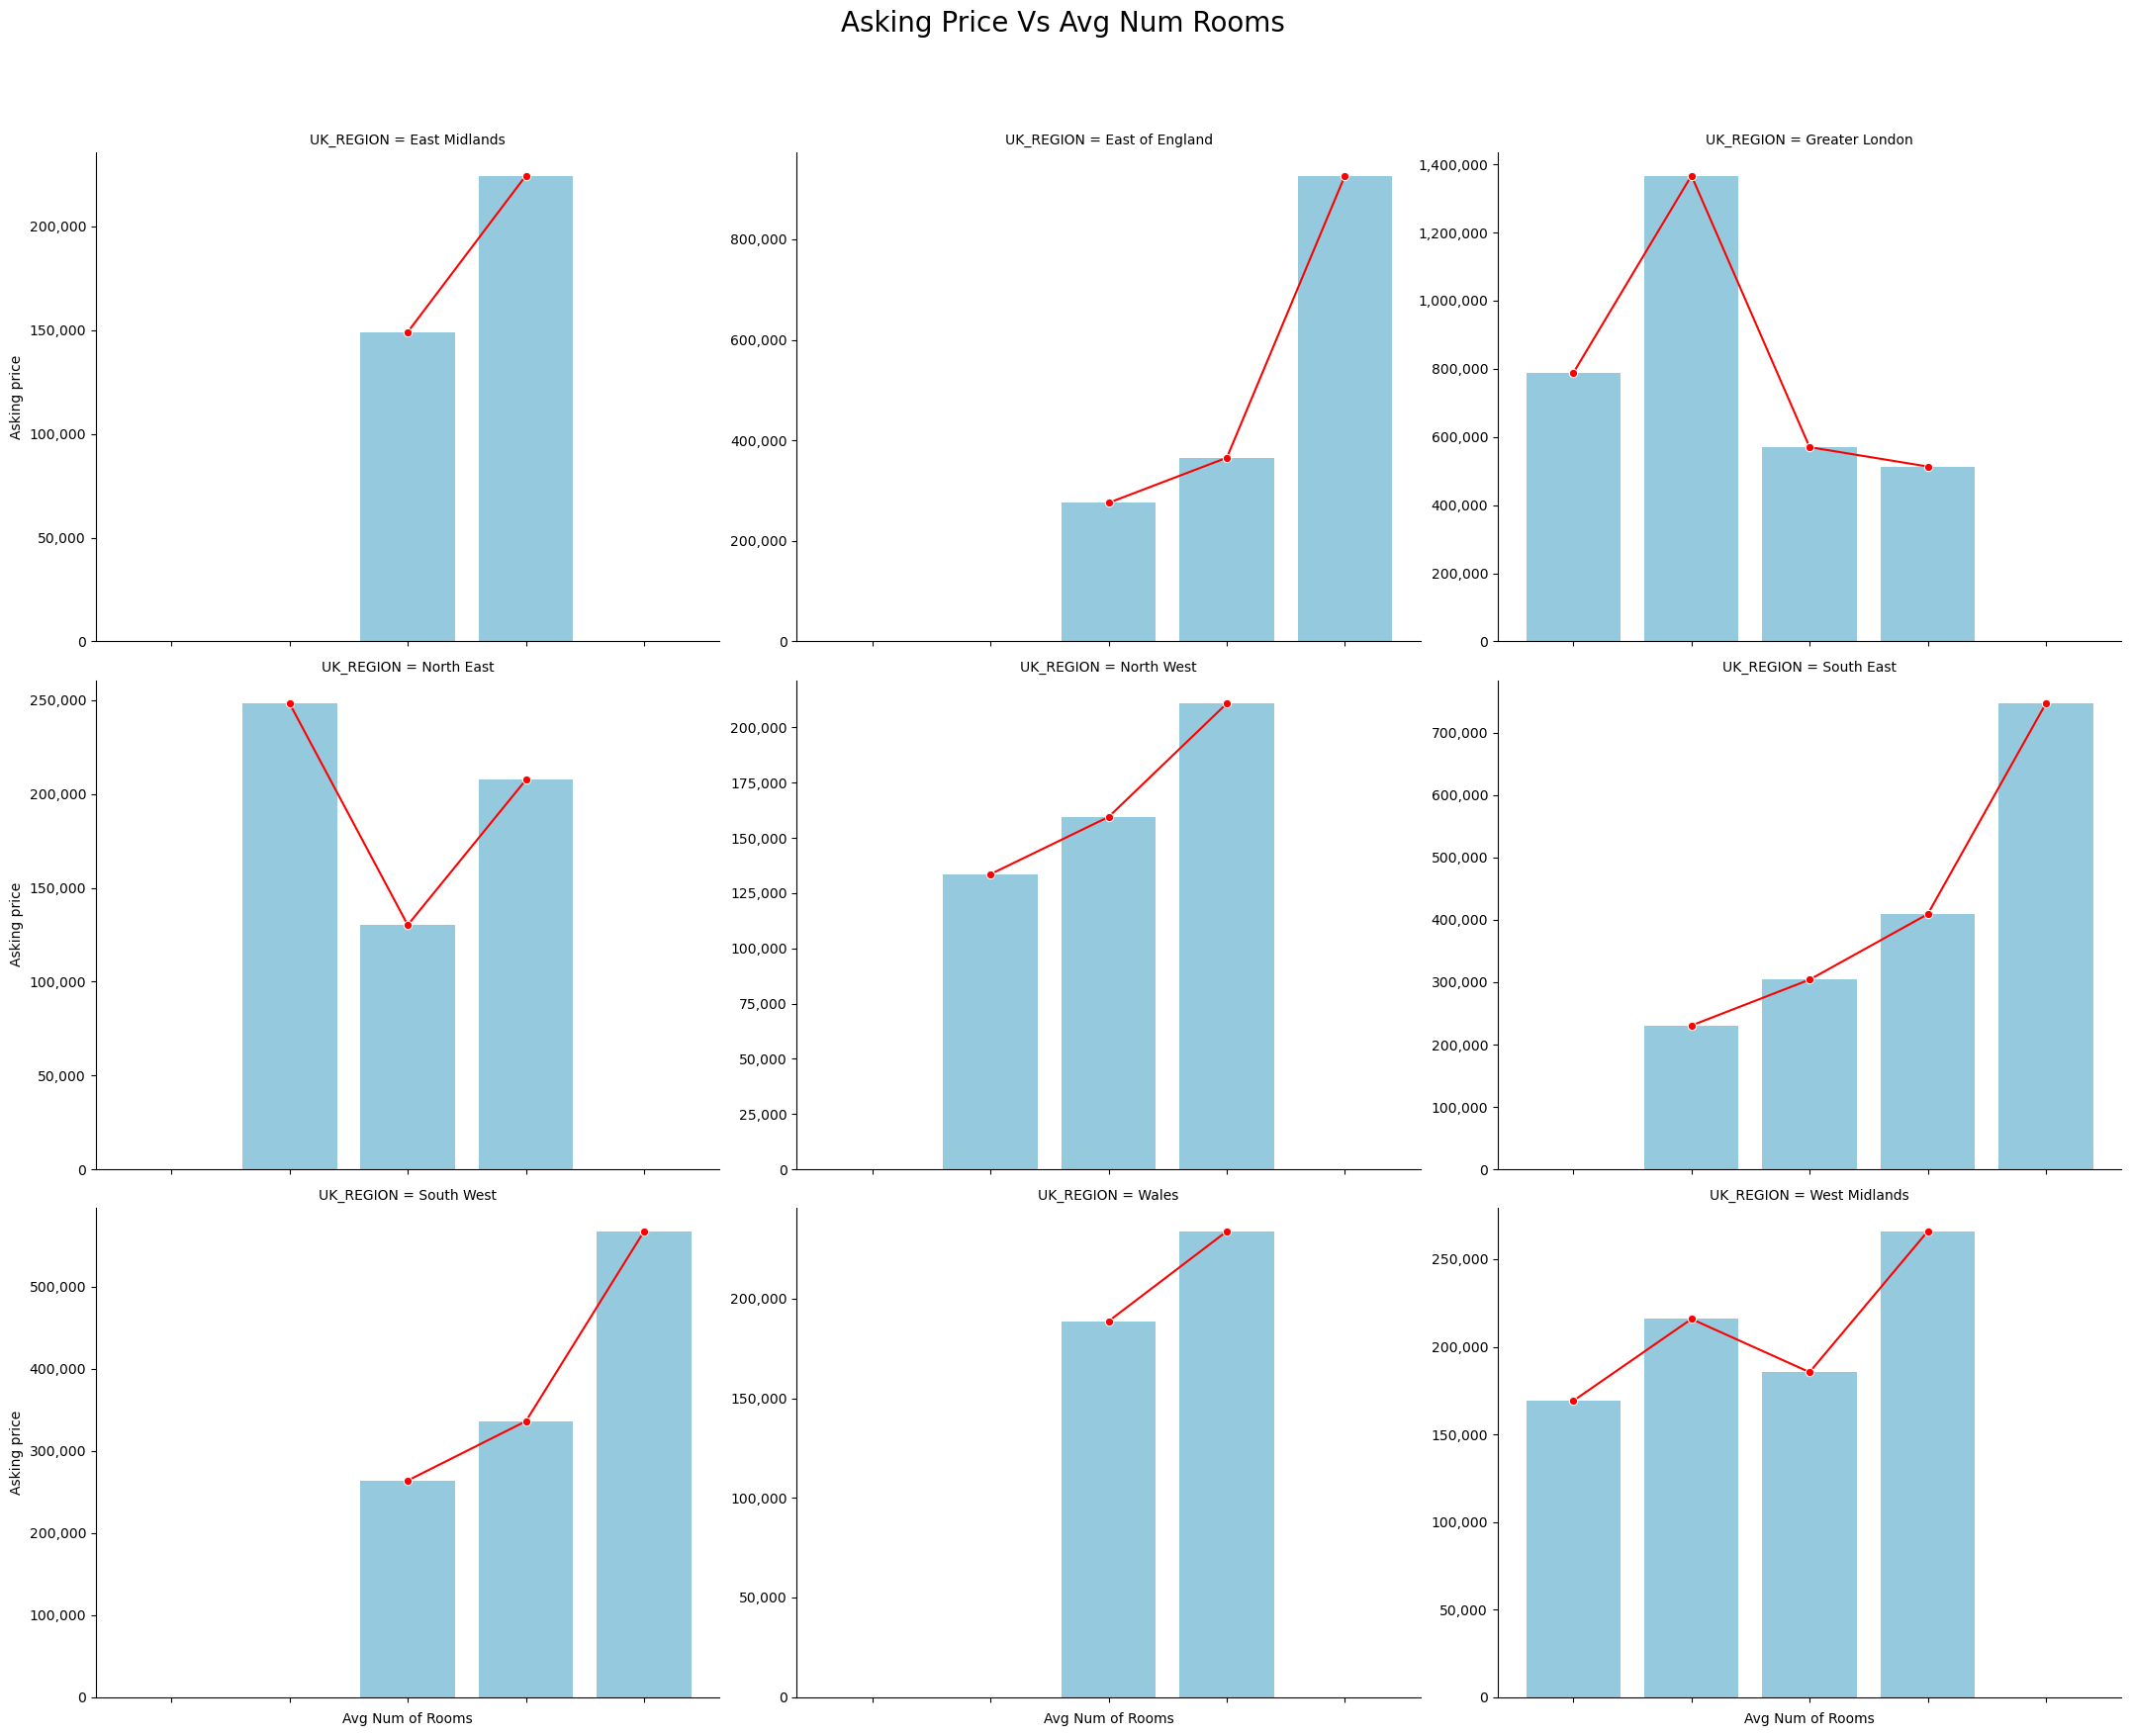

In [55]:
to_plot = data.groupby(['UK_REGION','AVG_BEDROOMS'])['AVG_ASKING_PRICE'].mean().reset_index()

# Convert the 'Category' column to a categorical type and specify the order
category_order = [0, 1, 2, 3, 4]
to_plot['AVG_BEDROOMS'] = pd.Categorical(to_plot['AVG_BEDROOMS'], categories=category_order, ordered=True)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


# Function to format the y-axis with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create the FacetGrid
g = sns.FacetGrid(to_plot, col="UK_REGION", height=6, aspect=1.2, col_wrap=3, sharey=False, sharex=True)
g.map_dataframe(sns.barplot, x="AVG_BEDROOMS", y="AVG_ASKING_PRICE", color=bar_color)

g.map_dataframe(sns.lineplot, x="AVG_BEDROOMS", y="AVG_ASKING_PRICE", color='red', marker='o')

# Rotate x labels for better readability and set thousands separator
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add labels and title
g.set_axis_labels("Avg Num of Rooms", "Asking price")
g.fig.suptitle('Asking Price Vs Avg Num Rooms ', fontsize=20)
g.fig.subplots_adjust(top=0.9)  # Adjust title position

# Show the plot
plt.show()


In [26]:
xx = data[data.UK_REGION=='Greater London']

In [27]:
xx = xx[xx.AVG_POPULATION<140000]

<Axes: xlabel='AVG_POPULATION', ylabel='AVG_ASKING_PRICE'>

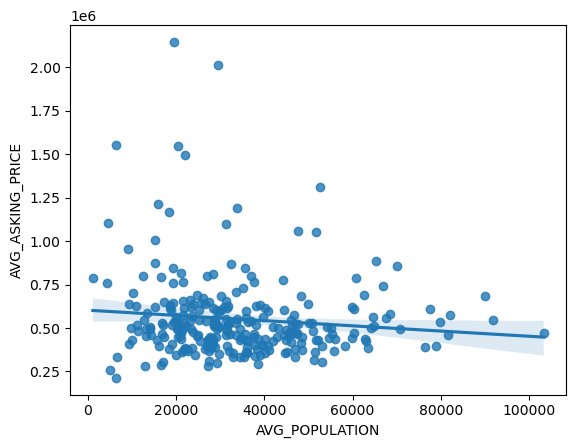

In [28]:
sns.regplot(x=xx.AVG_POPULATION, y=xx.AVG_ASKING_PRICE)

In [58]:
data[data.POSTCODE=='N1']

,UK_REGION,POSTCODE,AVG_ASKING_PRICE,AVG_ASKING_RENT_(PM),SALES_PER_MONTH,AVG_BEDROOMS,AVG_POPULATION,AVG_MV_SOLD,YIELD,PRICE_PER_ROOM
508,Greater London,N1,682723.0,1951.0,59.0,2.0,89895,40280657.0,0.034292,341361.5


In [54]:
data[data.POSTCODE=='SO15']

,UK_REGION,POSTCODE,AVG_ASKING_PRICE,AVG_ASKING_RENT_(PM),SALES_PER_MONTH,AVG_BEDROOMS,AVG_POPULATION,AVG_MV_SOLD,YIELD,PRICE_PER_ROOM
1446,South East,SO15,222357.0,777.0,40.0,2.0,41701,8894280.0,0.041933,111178.5
